In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv("E:\Python\PracticleData\data2.txt",names=['area','bedroom','price'])

In [5]:
#getting mean and std deviation of each data to minimize the error
data=(data-data.mean())/data.std()

In [6]:
data.head()

,area,bedroom,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [7]:
#defining the method of Linear Regression
def computeCost(X,y,theta):
    inner=np.power(((X*theta.T)-y),2)
    return np.sum(inner)/(2*len(X))

In [8]:
data.insert(0,'ones',1) ##0->column no.,  ones->new clmn name,   1->clmn value

In [9]:
data.head()

,ones,area,bedroom,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [10]:
##puttting value in X and y
X=data.iloc[:,0:3]
y=data.iloc[:,3:4]

In [12]:
type(X),type(y)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [13]:
## converting dataframes into matrix
X=np.matrix(X)
y=np.matrix(y)
theta=np.matrix(np.zeros((1,3))) 
#theta=np.matrix(np.ones((1,3))) as per requirement from In[111] line 3 

In [14]:
np.shape(X),np.shape(y),np.shape(theta),theta

((47, 3), (47, 1), (1, 3), matrix([[0., 0., 0.]]))

In [15]:
c=computeCost(X,y,theta)

In [16]:
c

0.48936170212765967

In [17]:
def gradientDescent(X,y,theta,alpha, iterations):
    temp = np.matrix(np.zeros((1,3)))
    parameters = 3  #theta0,theta1,theta2
    cost = np.zeros(iterations) #error of every iteration
    for i in range(iterations):
        error = (X*theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j]) 
            temp[0,j] = theta[0,j] - ((alpha/len(X)) * np.sum(term))
        theta = temp
        cost[i] = computeCost(X,y,theta) 
    return theta,cost

In [18]:
#a,b=gradientDescent(X,y,theta,0.1,10)
#changing the values of alpha to checking the cost (must be decreases)
a,b=gradientDescent(X,y,theta,0.01,100000)
#now change the theta values from zeroes to smthing but 
#it will not change a'(as we got minimum of a at alpha=0.01 and iter=10000 ) 

In [19]:
a,"\t",b    #-1.18120643e-16,  8.84765988e-01, -5.31788197e-02    b=0.13068648

(matrix([[-1.18120643e-16,  8.84765988e-01, -5.31788197e-02]]),
 '\t',
 array([0.4805491 , 0.47198588, 0.46366462, ..., 0.13068648, 0.13068648,
        0.13068648]))

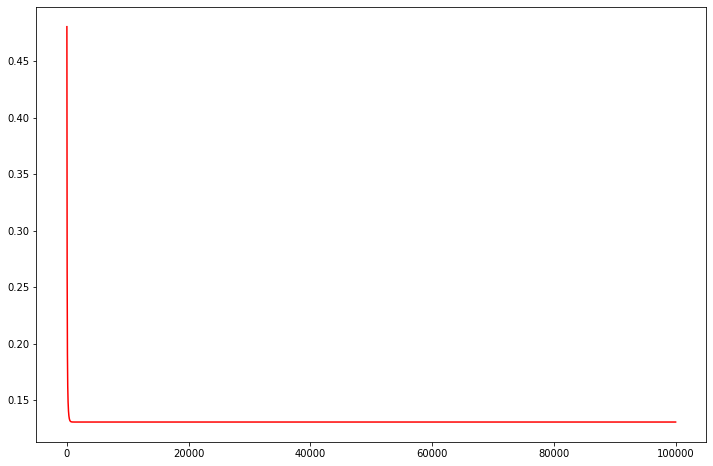

In [20]:
fig,ax = plt.subplots(figsize=(12,8))                          
x=np.arange(100000)
y=b
ax.plot(x,y,'r')                                                  
#ax.scatter(b, np.arange(100000))                                   
#data.plot(kind='scatter',x=b,y=100000,figsize=(12,8))